In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
vistas        = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_3_vistas.csv')

In [19]:
postulaciones = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_4_postulaciones.csv')

In [20]:
avisos_online = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_5_avisos_online.csv')

In [2]:
avisos_detalle = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_6_avisos_detalle.csv')

In [3]:
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [3]:
len(avisos_detalle)

19685

In [3]:
# Estas columnas no aportan suficiente información
# idpais: Siempre vale 1
# ciudad: Hay alrededor de 50 registros con esta información, el resto es NaN
# mapacalle: Hay sólo 683 registros con esta información.
avisos_detalle = avisos_detalle.drop(axis=1, labels=['idpais', 'ciudad', 'mapacalle'])

In [4]:
(avisos_detalle['nombre_area'].value_counts()).describe()

count     186.000000
mean      105.833333
std       262.884599
min         1.000000
25%         6.000000
50%        26.500000
75%        97.500000
max      2464.000000
Name: nombre_area, dtype: float64

In [5]:
avisos_detalle['nombre_area'].value_counts()[(avisos_detalle['nombre_area'].value_counts() > 100)].sum()

16331

In [6]:
avisos_detalle.head()

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [7]:
desc = avisos_detalle.iloc[1]['descripcion']

In [8]:
from descripcion_parser import strip_html_tags as dp_parse

In [9]:
avisos_detalle['descripcion'] = avisos_detalle['descripcion'].map(dp_parse)

In [11]:
avisos_detalle.head()

In [13]:
avisos_detalle.columns[0]

'idaviso'

In [16]:
postulantes = pd.read_csv('/home/luciano/orga-datos/datos_preprocesados/postulantes.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
postulantes.head()

,idpostulante,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario,fechanacimiento,sexo
0,0z5Dmrd,0,0,0,0,0,0,Graduado,1965-10-22,MASC
1,0z5JW1r,0,0,Graduado,0,Graduado,Graduado,Abandonado,1971-04-09,MASC
2,0z5VvGv,0,0,0,0,Graduado,0,0,1987-10-18,MASC
3,0zB01pE,0,0,0,0,0,Graduado,Abandonado,1989-12-01,MASC
4,0zB026d,0,0,0,0,Graduado,Graduado,0,1978-02-23,FEM


In [18]:
postulantes[postulantes['idpostulante'] == '6M9ZQR']

,idpostulante,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario,fechanacimiento,sexo
56726,6M9ZQR,Graduado,0,0,0,0,0,Graduado,1976-03-29,FEM


In [19]:
avisos_detalle[avisos_detalle['idaviso'] == 739260]

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa


In [21]:
avisos_detalle.drop_duplicates(subset='id')

ValueError: not enough values to unpack (expected 2, got 0)

In [29]:
from sklearn.metrics import jaccard_similarity_score

In [22]:
desc_1 = avisos_detalle['descripcion'][0]
desc_2 = avisos_detalle['descripcion'][1]

In [24]:
dp_parse(desc_1)

'Empresa:  Distribuidor de repuestos automotor, Importador y Distribuidor de correas agrícolas, industriales y automotor en Argentina Sexo Postulante:  Indistinto Área:  Ventas País/Ciudad:  Argentina, Rosario y Santa Fe Industria:  Automotriz Salario:  Comisión sobre ventas Vacantes:1 Tipo de puesto de trabajo:  Full-time Nuestra empresa es distribuidora mayorista de repuestos para automotor. Importamos y distribuímos correas agrícolas e industriales Buscamos un\xa0 representante de ventas para la provincia de Santa Fe: Rosario y Gran Rosari, ciudad de Santa Fe y zona de influencia. Requisitos: Secundario completo\xa0 (excluyente) Dedicación full time Experiencia en ventas Buena presencia Movilidad propia Domicilio en la zona Conocimiento del ramo Ofrecemos: Comisiones sobre ventas. Capacitación Cartera de clientes Fuerte apoyo logístico \xa0 \xa0'

In [23]:
desc_2

'Solicitamos para importante cadena de farmacias de la Zona Oeste, ENFERMERAS con experiencia, para atención en Vacunatorio. Requisitos Sexo femenino, de 23 a 45 años. Resida z/Oeste (excluyente) Experiencia mínima de 3 años (preferentemente en vacunatorios) Poseer título y matrícula habilitante Disponibilidad horaria'

In [8]:
desc_2

'solicitamos importante cadena farmacias zona oeste  enfermeras experiencia  atencion vacunatorio  sexo femenino  23 45 años  resida z oeste  excluyente  experiencia minima 3 años  preferentemente vacunatorios  poseer titulo matricula habilitante disponibilidad horaria'

In [38]:
len(desc_1)

1265

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

esp_stop_words = set(["0","1","2","3","4","5","6","7","8","9","_","a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde","despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces","entre","era","erais","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estabais","estaban","estabas","estad","estada","estadas","estado","estados","estais","estamos","estan","estando","estar","estaremos","estará","estarán","estarás","estaré","estaréis","estaría","estaríais","estaríamos","estarían","estarías","estas","este","estemos","esto","estos","estoy","estuve","estuviera","estuvierais","estuvieran","estuvieras","estuvieron","estuviese","estuvieseis","estuviesen","estuvieses","estuvimos","estuviste","estuvisteis","estuviéramos","estuviésemos","estuvo","está","estábamos","estáis","están","estás","esté","estéis","estén","estés","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fuerais","fueran","fueras","fueron","fuese","fueseis","fuesen","fueses","fui","fuimos","fuiste","fuisteis","fuéramos","fuésemos","g","general","gran","grandes","gueno","h","ha","haber","habia","habida","habidas","habido","habidos","habiendo","habla","hablan","habremos","habrá","habrán","habrás","habré","habréis","habría","habríais","habríamos","habrían","habrías","habéis","había","habíais","habíamos","habían","habías","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","has","hasta","hay","haya","hayamos","hayan","hayas","hayáis","he","hecho","hemos","hicieron","hizo","horas","hoy","hube","hubiera","hubierais","hubieran","hubieras","hubieron","hubiese","hubieseis","hubiesen","hubieses","hubimos","hubiste","hubisteis","hubiéramos","hubiésemos","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","por qué","porque","posible","primer","primera","primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","sal","salvo","se","sea","seamos","sean","seas","segun","segunda","segundo","según","seis","ser","sera","seremos","será","serán","serás","seré","seréis","sería","seríais","seríamos","serían","serías","seáis","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","suyos","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendremos","tendrá","tendrán","tendrás","tendré","tendréis","tendría","tendríais","tendríamos","tendrían","tendrías","tened","teneis","tenemos","tener","tenga","tengamos","tengan","tengas","tengo","tengáis","tenida","tenidas","tenido","tenidos","teniendo","tenéis","tenía","teníais","teníamos","tenían","tenías","tercera","ti","tiempo","tiene","tienen","tienes","toda","todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuve","tuviera","tuvierais","tuvieran","tuvieras","tuvieron","tuviese","tuvieseis","tuviesen","tuvieses","tuvimos","tuviste","tuvisteis","tuviéramos","tuviésemos","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","éramos","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"])
#esp_stop_words = set(['el', 'la', 'los', 
#        'les', 'que', 'para', 'las', 'como', 'donde', 'a', 'y', 
#        'o', 'por', 'pero', 'sobre', 'sin', 'en', 'con', 'tras',
#        'contra', 'queres', 'trabajo', 'se', 'de', 'requisito', 'requisitos',
#        'plata'])

tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words = esp_stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(avisos_detalle['descripcion'])

In [29]:
tfidf_matrix

<19685x33504 sparse matrix of type '<class 'numpy.float64'>'
	with 1395379 stored elements in Compressed Sparse Row format>

In [51]:
from numpy.linalg import svd
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
u, s, vt = svds(tfidf_matrix, k=1000)

KeyboardInterrupt: 

In [11]:
s = s[::-1]

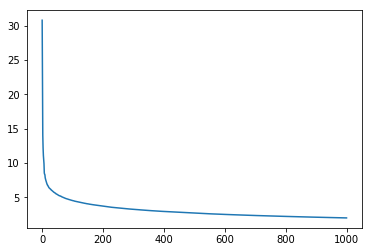

In [12]:
plt.plot(s)
#s[:25]

In [28]:
def calcular_distancias(id_1, id_2):
    dist = np.linalg.norm(u[id_1]-u[id_2])
    print('Desc 1:', avisos_detalle['descripcion'][id_1])
    print()
    print('Desc 2:', avisos_detalle['descripcion'][id_2])
    return dist

In [30]:
calcular_distancias(0, 1)

Desc 1: empresa  distribuidor repuestos automotor  importador distribuidor correas agricolas  industriales automotor argentina sexo postulante  indistinto area  ventas pais ciudad  argentina  rosario santa fe industria  automotriz salario  comision ventas vacantes 1 tipo puesto trabajo  full time nuestra empresa es distribuidora mayorista repuestos automotor  importamos distribuimos correas agricolas e industriales buscamos un representante ventas provincia santa fe  rosario gran rosari  ciudad santa fe zona influencia  requisitos  secundario completo  excluyente  dedicacion full time experiencia ventas buena presencia movilidad propia domicilio zona conocimiento del ramo ofrecemos  comisiones ventas  capacitacion cartera clientes fuerte apoyo logistico

Desc 2: solicitamos importante cadena farmacias zona oeste  enfermeras experiencia  atencion vacunatorio  sexo femenino  23 45 años  resida z oeste  excluyente  experiencia minima 3 años  preferentemente vacunatorios  poseer titulo mat

0.3148997120627826

In [32]:
calcular_distancias(0, 2)

Desc 1: empresa  distribuidor repuestos automotor  importador distribuidor correas agricolas  industriales automotor argentina sexo postulante  indistinto area  ventas pais ciudad  argentina  rosario santa fe industria  automotriz salario  comision ventas vacantes 1 tipo puesto trabajo  full time nuestra empresa es distribuidora mayorista repuestos automotor  importamos distribuimos correas agricolas e industriales buscamos un representante ventas provincia santa fe  rosario gran rosari  ciudad santa fe zona influencia  requisitos  secundario completo  excluyente  dedicacion full time experiencia ventas buena presencia movilidad propia domicilio zona conocimiento del ramo ofrecemos  comisiones ventas  capacitacion cartera clientes fuerte apoyo logistico

Desc 2: te gusta manejar  ganar haciendo lo te gusta  si contas licencia profesional caba ya estas listo empezar  si no tenes te interesa nosotros te ayudamos tramitarla  si tenes entre 21 65 años estas buscando esta es tu oportunidad 

0.2828552917021278

In [40]:
desc = "buscamos un chofer para manejar taxis con licencia profesional en caba horario extendido se trabaja feriados con experiencia en el rubro con probable"

In [46]:
avisos_detalle[avisos_detalle['descripcion'].str.contains('enfermer')]['descripcion']
desc_1719 = avisos_detalle['descripcion'][1719]
desc_1720 = avisos_detalle['descripcion'][1720]

In [48]:
desc_1719

'buscan enfermeros matricula habilitante internacion domiciliaria  inmediato guardias 12 horas pediatriacas diurnas  dia medio 12 horas  zonas nordelta del viso enviar cv'

In [49]:
desc_1720

In [54]:
calcular_distancias(1, 1719)

Desc 1: solicitamos importante cadena farmacias zona oeste  enfermeras experiencia  atencion vacunatorio  sexo femenino  23 45 años  resida z oeste  excluyente  experiencia minima 3 años  preferentemente vacunatorios  poseer titulo matricula habilitante disponibilidad horaria

Desc 2: buscan enfermeros matricula habilitante internacion domiciliaria  inmediato guardias 12 horas pediatriacas diurnas  dia medio 12 horas  zonas nordelta del viso enviar cv


0.2924782922164528

In [38]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
#print(energy_percentage)
sum(energy_percentage[:250])

59.507487490829966